In [1]:
test_problems = {'Anchor': 'Problem. Find all odd positive integers n greater than 1 such that for any relatively prime divisors a and $b$ of $n$ , the number $a+b-1$ is also a divisor of $n$ .  \n\n(2001 Russian Mathematical Olympiad)  \n\nSolution. We will call a number ”good” if it satisfies the given conditions. It is not difficult to see that all prime powers are good. Suppose $n$ is a good number that has at least two distinct prime factors. Let $n=p^{r}s$ , where $p$ is the smallest prime dividing $n$ and $s$ is not divisible by $p$ . Because $n$ is good, $p+s-1$ must divide $n$ . For any prime $q$ dividing $s$ , $s<p+s-1<s+q$ , so $q$ does not divide $p+s-1$ . Therefore, the only prime factor of $p+s-1$ is $p$ . Then $s=p^{c}-p+1$ for some $c>1$ . Because $p^{c}$ must also divide $n$ , $p^{c}+s-1=2p^{c}-p$ divides $n$ . Because $2p^{c-1}-1$ has no factors of $p$ , it must divide $s$ . But a simple computation shows that $\\frac{p-1}{2}<\\frac{p^{c}-p+1}{2p^{c-1}-1}<\\frac{p+1}{2}$ , therefore $2p^{c-1}-1$ cannot divide $s$ .  \n\n', 'Golden': 'Problem. Find the smallest positive integer $K$ such that every $K$ -element subset of $\\{1,2,\\ldots,50\\}$ contains two distinct elements $a,b$ such that $a+b$ divides ab.  \n\n(1996 Chinese Mathematical Olympiad)  \n\nSolution. The minimal value is $k=39$ . Suppose $a,b\\in S$ are such that $a+b$ divides $a b$ . Let $c=g c d(a,b)$ , and put $a=c a_{1}$ , $b=c b_{1}$ , so that $a_{1}$ and $b_{1}$ are relatively prime. Then $c(a_{1}+b_{1})$ divides $c^{2}a_{1}b_{1}$ , so $a_{1}+b_{1}$ divides $c a_{1}b_{1}$ . Since $a_{1}$ and $b_{1}$ have no common factor, neither do $a_{1}$ and $a_{1}+b_{1}$ , or $b_{1}$ and $a_{1}+b_{1}$ . In short, $a_{1}+b_{1}$ divides $c$ .  \n\nSince $S\\subseteq\\{1,\\dots,50\\}$ , we have $a+b\\leq99$ , so $c(a_{1}+b_{1})\\leq99$ , which implies $a_{1}+b_{1}\\leq9$ ; on the other hand, of course $a_{1}+b_{1}\\geq3$ . An exhaustive search produces 23 pairs $a,b$ satisfying the condition:  \n\n$$\n\\begin{array}{c c c}{{a_{1}+b_{1}=3}}&{{(6,3),(12,6),(18,9),(24,12),}}&{{}}\\\\ {{}}&{{}}&{{}}\\\\ {{a_{1}+b_{1}=4}}&{{(12,4),(24,8),(42,21),(48,24)}}&{{}}\\\\ {{a_{1}+b_{1}=4}}&{{(12,4),(24,8),(36,12),(48,16)}}&{{}}\\\\ {{a_{1}+b_{1}=5}}&{{(20,5),(40,10),(15,10),(30,20),(45,30)}}&{{}}\\\\ {{a_{1}+b_{1}=6}}&{{(30,6)}}&{{(30,6)}}&{{}}\\\\ {{a_{1}+b_{1}=7}}&{{}}&{{(42,7),(35,14),(28,21)}}&{{}}\\\\ {{a_{1}+b_{1}=8}}&{{}}&{{(40,24)}}&{{}}\\\\ {{a_{1}+b_{1}=9}}&{{}}&{{(45,36)}}&{{}}\\end{array}\n$$  \n', 'Silver': 'Problem. Let  \n\n$$\n\\prod_{n=1}^{1996}(1+n x^{3^{n}})=1+a_{1}x^{k_{1}}+a_{2}x^{k_{2}}+\\cdot\\cdot\\cdot+a_{m}x^{k_{m}},\n$$  \n\nwhere $a_{1},a_{2},\\ldots,a_{m}$ are nonzero and $k_{1}<k_{2}<\\dots<k_{m}$ , Find $a_{1996}$ .  \n\n(1996 Turkish Mathematical Olympiad)  \n\nSolution. Note that $k_{i}$ is the number obtained by writing $i$ in base 2 and reading the result as a number in base 3, and $a_{i}$ is the sum of the exponents of the powers of 3 used. In particular, $1996=2^{10}+2^{9}+2^{8}+2^{7}+2^{6}+2^{3}+2^{2}$ , so  \n\n$$\na_{1996}=10+9+8+7+6+3+2=45.\n$$  \n\n', 'Wrong': 'Problem. Prove that there are no positive integers x and y such that  \n\n$$\nx^{5}+y^{5}+1=(x+2)^{5}+(y-3)^{5}.\n$$  \n\nSolution. Notice that $z^{5}\\equiv z$ (mod 10), hence $x+y+1\\equiv(x+2)+(y-3)$ (mod 10), impossible.  \n\n'}

In [2]:
cls_tokens = {}

In [18]:
from transformers import AutoModel, AutoTokenizer
import torch
device = torch.device("cuda")

model_name = "math-similarity/Bert-MLM_arXiv-MP-class_zbMath"
model = AutoModel.from_pretrained(model_name).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)

from transformers import AutoModel, AutoTokenizer
import torch
from tqdm import tqdm

def get_cls_embeddings_sliding(text, model, tokenizer, window_size=32, stride=1, device="cuda"):
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", add_special_tokens=True)
    input_ids = inputs["input_ids"][0]  # shape: [seq_len]

    cls_tokens = []

    with torch.no_grad():
        for start in tqdm(range(0, len(input_ids) - window_size + 1, stride)):
            window_ids = input_ids[start:start+window_size]
            if len(window_ids) < window_size:
                break

            window_ids = window_ids.unsqueeze(0).to(device)  # Add batch dim
            outputs = model(window_ids)
            cls_embedding = outputs.last_hidden_state[0, 0].detach().cpu()  # CLS token
            cls_tokens.append(cls_embedding)

    return cls_tokens


In [21]:
import matplotlib.pyplot as plt
import numpy as np

cls_tokens_anchor = get_cls_embeddings_sliding(test_problems['Anchor'], model, tokenizer, window_size=128)
cls_tokens_gold = get_cls_embeddings_sliding(test_problems['Golden'], model, tokenizer, window_size=128)

100%|██████████| 265/265 [00:01<00:00, 145.27it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (847 > 512). Running this sequence through the model will result in indexing errors
100%|██████████| 720/720 [00:04<00:00, 175.67it/s]


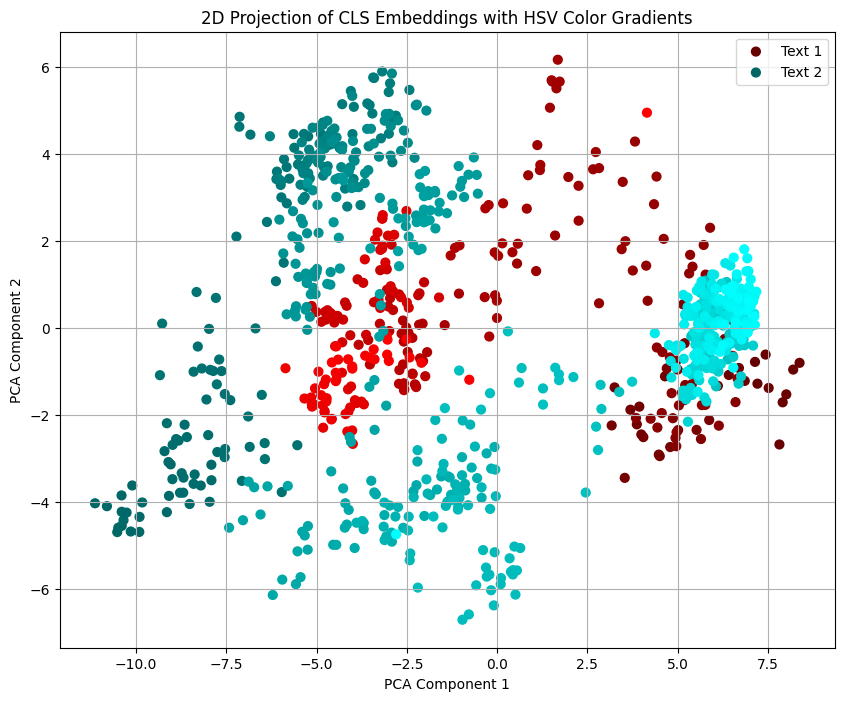

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import colorsys

def plot_cls_embeddings_2d(cls_embeddings_per_text):
    """
    Plot 2D projections of CLS embeddings for multiple texts using distinct HSV color gradients.

    Args:
        cls_embeddings_per_text (List[List[torch.Tensor]]): List of CLS embedding sequences per text.
    """
    plt.figure(figsize=(10, 8))
    num_texts = len(cls_embeddings_per_text)

    for i, cls_list in enumerate(cls_embeddings_per_text):
        if len(cls_list) == 0:
            continue
        
        emb_array = np.stack([e.numpy() for e in cls_list])
        pca = PCA(n_components=2)
        reduced = pca.fit_transform(emb_array)

        num_points = reduced.shape[0]

        # Assign a unique hue for each text
        hue = i / num_texts  # evenly spaced hues
        colors = [colorsys.hsv_to_rgb(hue, 1.0, 0.4 + 0.6 * (j / num_points)) for j in range(num_points)]

        plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, label=f'Text {i+1}', s=40)

    plt.title("2D Projection of CLS Embeddings with HSV Color Gradients")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.legend()
    plt.show()


plot_cls_embeddings_2d([cls_tokens_anchor, cls_tokens_gold])

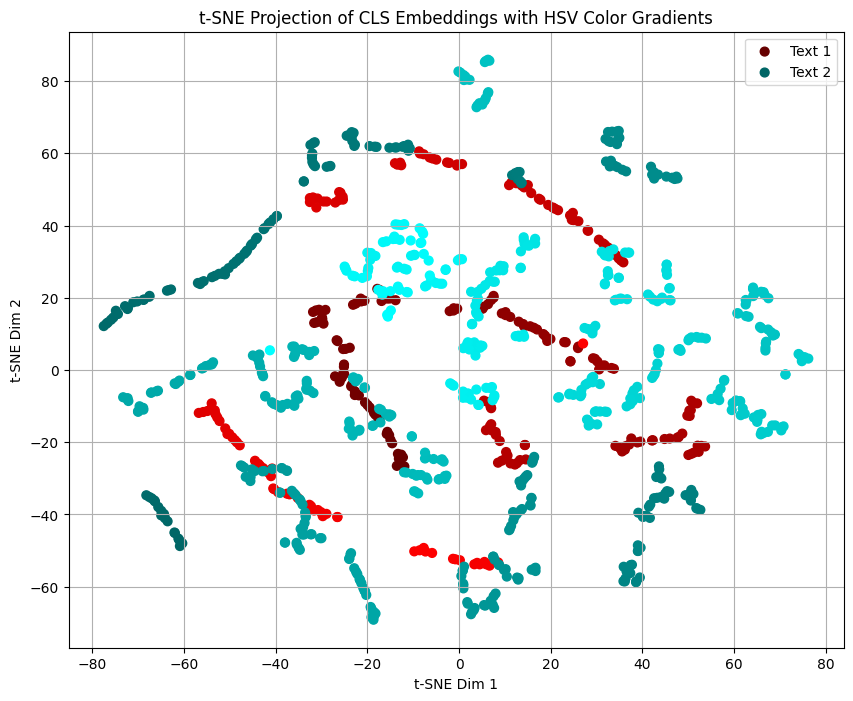

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import colorsys

def plot_cls_embeddings_tsne(cls_embeddings_per_text, perplexity=5):
    """
    Plot 2D t-SNE projection of CLS embeddings for multiple texts using HSV gradients.

    Args:
        cls_embeddings_per_text (List[List[torch.Tensor]]): List of CLS embedding sequences per text.
        perplexity (int): t-SNE perplexity parameter.
    """
    plt.figure(figsize=(10, 8))
    num_texts = len(cls_embeddings_per_text)

    for i, cls_list in enumerate(cls_embeddings_per_text):
        if len(cls_list) == 0:
            continue

        emb_array = np.stack([e.numpy() for e in cls_list])
        
        # Apply t-SNE to reduce to 2D
        tsne = TSNE(n_components=2, perplexity=perplexity, init='random', random_state=42)
        reduced = tsne.fit_transform(emb_array)

        num_points = reduced.shape[0]

        # HSV color gradient: dark (start) to bright (end)
        hue = i / num_texts
        colors = [colorsys.hsv_to_rgb(hue, 1.0, 0.4 + 0.6 * (j / num_points)) for j in range(num_points)]

        plt.scatter(reduced[:, 0], reduced[:, 1], c=colors, label=f'Text {i+1}', s=40)

    plt.title("t-SNE Projection of CLS Embeddings with HSV Color Gradients")
    plt.xlabel("t-SNE Dim 1")
    plt.ylabel("t-SNE Dim 2")
    plt.grid(True)
    plt.legend()
    plt.show()
plot_cls_embeddings_tsne([cls_tokens_anchor, cls_tokens_gold])

In [31]:
import torch
import torch.nn.functional as F

def find_most_similar_cls_chunks(cls1, cls2, tokens1, tokens2, tokenizer, window=10):
    """
    Find most similar CLS token pairs in thirds of the sequences.
    
    Args:
        cls1, cls2: Lists of CLS embeddings (torch.Tensor)
        tokens1, tokens2: Tokenized inputs (lists of token ids)
        tokenizer: Tokenizer to decode token ids
        window: Number of tokens to include before/after matched index when decoding
    """
    def cosine_sim_matrix(a, b):
        a = F.normalize(torch.stack(a), dim=1)
        b = F.normalize(torch.stack(b), dim=1)
        return torch.matmul(a, b.T)  # (len(a) x len(b))

    n1, n2 = len(cls1), len(cls2)
    thirds1 = [(0, n1//3), (n1//3, 2*n1//3), (2*n1//3, n1)]
    thirds2 = [(0, n2//3), (n2//3, 2*n2//3), (2*n2//3, n2)]

    sim_matrix = cosine_sim_matrix(cls1, cls2)

    print(f"\n{'='*20} MOST SIMILAR CLS TOKENS BY TEXT REGION {'='*20}")
    
    for i, ((start1, end1), (start2, end2)) in enumerate(zip(thirds1, thirds2)):
        sub_sim = sim_matrix[start1:end1, start2:end2]
        max_val, max_idx = torch.max(sub_sim.reshape(-1), dim=0)
        idx1_rel, idx2_rel = divmod(max_idx.item(), end2 - start2)
        idx1 = start1 + idx1_rel
        idx2 = start2 + idx2_rel

        print(f"\n--- Region {i+1} (1/3 slice) ---")
        print(f"Similarity: {max_val.item():.4f}")
        print(f"Text 1 (around idx {idx1}):")
        print(tokenizer.decode(tokens1[idx1 : idx1 + window]))
        print(f"Text 2 (around idx {idx2}):")
        print(tokenizer.decode(tokens2[idx2 : idx2 + window]))

window = 128

tokens1 = tokenizer(test_problems['Anchor'], return_tensors='pt')['input_ids'][0].tolist()
tokens2 = tokenizer(test_problems['Golden'], return_tensors='pt')['input_ids'][0].tolist()

find_most_similar_cls_chunks(cls_tokens_anchor, cls_tokens_gold, tokens1, tokens2, tokenizer, window)


==================== MOST SIMILAR CLS TOKENS BY TEXT REGION ====================

--- Region 1 (1/3 slice) ---
Similarity: 0.8760
Text 1 (around idx 62):
a number ” good ” if it satisfies the given conditions. it is not difficult to see that all prime powers are good. suppose $ n $ is a good number that has at least two distinct prime factors. let $ n = p ^ { r } s $, where $ p $ is the smallest prime dividing $ n $ and $ s $ is not divisible by $ p $. because $ n $ is good, $ p + s - 1 $ must divide $ n $. for any prime $ q $ dividing $ s $, $ s < p + s - 1 < s + q $, so
Text 2 (around idx 0):
[CLS] problem. find the smallest positive integer $ k $ such that every $ k $ - element subset of $ \ { 1, 2, \ ldots, 50 \ } $ contains two distinct elements $ a, b $ such that $ a + b $ divides ab. ( 1996 chinese mathematical olympiad ) solution. the minimal value is $ k = 39 $. suppose $ a, b \ in s $ are such that $ a + b $ divides $ a b $. let $ c = g c d ( a, b ) $, and put $ a = c a _ { 

Most similar window starts at token 220


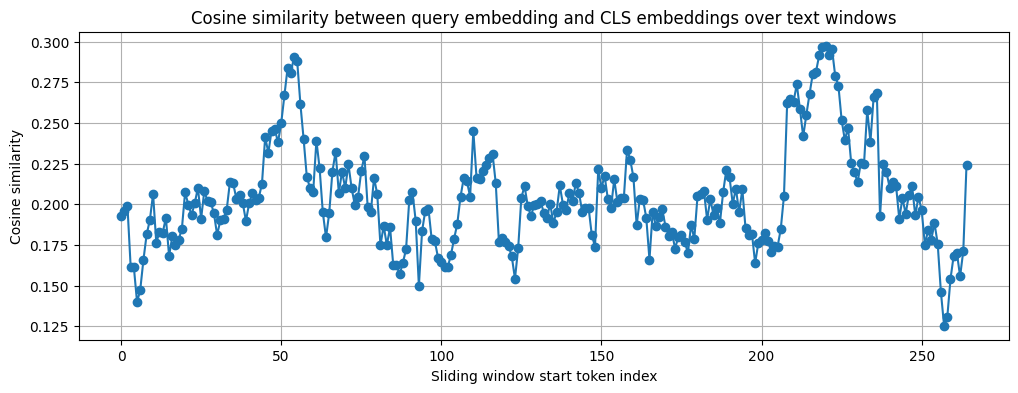

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

def plot_query_similarity(cls_embeddings, query_embedding):
    """
    Plot cosine similarity of query embedding against CLS embeddings of text.

    Args:
        cls_embeddings: list or torch.Tensor or np.ndarray of embeddings,
                        each element shape (embedding_dim,)
                        or shape (num_windows, embedding_dim)
        query_embedding: torch.Tensor or np.ndarray, shape (embedding_dim,)
    """
    # If cls_embeddings is a list of tensors/arrays, stack them
    if isinstance(cls_embeddings, list):
        # Convert elements to tensors if needed
        cls_embeddings = [torch.tensor(e) if not isinstance(e, torch.Tensor) else e for e in cls_embeddings]
        cls_embeddings = torch.stack(cls_embeddings)  # shape (num_windows, embedding_dim)

    elif isinstance(cls_embeddings, np.ndarray):
        cls_embeddings = torch.from_numpy(cls_embeddings)

    # Convert query_embedding to tensor if needed
    if isinstance(query_embedding, np.ndarray):
        query_embedding = torch.from_numpy(query_embedding)

    # Normalize embeddings to unit vectors
    cls_norm = F.normalize(cls_embeddings, p=2, dim=1).to(device)
    query_norm = F.normalize(query_embedding.unsqueeze(0), p=2, dim=1).to(device)  # shape (1, embedding_dim)

    # Compute cosine similarity between query and all CLS embeddings
    similarity = torch.matmul(cls_norm, query_norm.t()).squeeze(1).cpu().numpy()  # shape (num_windows,)
    print(f"Most similar window starts at token {similarity.argmax()}")

    # Plot similarity as line plot
    plt.figure(figsize=(12, 4))
    plt.plot(similarity, marker='o', linestyle='-')
    plt.title("Cosine similarity between query embedding and CLS embeddings over text windows")
    plt.xlabel("Sliding window start token index")
    plt.ylabel("Cosine similarity")
    plt.grid(True)
    plt.show()


query = "Find problems that use divisibility to limit number of options."
inputs = tokenizer(query, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
# CLS embedding: first token embedding
query_embedding = outputs.last_hidden_state[:, 0, :]  # shape: (batch_size=1, hidden_dim)
query_embedding = query_embedding.squeeze(0)  # shape: (hidden_dim,)

plot_query_similarity(cls_tokens_anchor, query_embedding)

In [41]:
idx = 220
window = 128
tokenizer.decode(tokens1[idx : idx + window])

'p $. then $ s = p ^ { c } - p + 1 $ for some $ c > 1 $. because $ p ^ { c } $ must also divide $ n $, $ p ^ { c } + s - 1 = 2p ^ { c } - p $ divides $ n $. because $ 2p ^ { c - 1 } - 1 $ has no factors of $ p $, it must divide $ s $. but a simple computation shows that $ \\ frac { p - 1 } { 2 } < \\ frac { p ^ { c } - p + 1 } { 2'